In [ ]:
def screen_capture():
  import pyscreenshot as ImageGrab
  import time
    
  images_folder = "captured_images/9/"
    
  for i in range(20):
    time.sleep(5)
    im=ImageGrab.grab(bbox=(60,170,400,550))
    print("saved...",i)
    im.save(images_folder+str(i)+'.png')
    print("clear screen and redraw again....")
#screen_capture()


saved... 0
clear screen and redraw again....
saved... 1
clear screen and redraw again....
saved... 2
clear screen and redraw again....
saved... 3
clear screen and redraw again....
saved... 4
clear screen and redraw again....
saved... 5
clear screen and redraw again....
saved... 6
clear screen and redraw again....
saved... 7
clear screen and redraw again....
saved... 8
clear screen and redraw again....
saved... 9
clear screen and redraw again....
saved... 10
clear screen and redraw again....
saved... 11
clear screen and redraw again....
saved... 12
clear screen and redraw again....
saved... 13
clear screen and redraw again....
saved... 14
clear screen and redraw again....
saved... 15
clear screen and redraw again....
saved... 16
clear screen and redraw again....
saved... 17
clear screen and redraw again....


In [13]:
import numpy as np
def create_label(image_name):
    if image_name == '0':
        return np.array([1,0,0,0,0,0,0,0,0,0])
    elif image_name == '1':
        return np.array([0,1,0,0,0,0,0,0,0,0])
    elif image_name == '2':
        return np.array([0,0,1,0,0,0,0,0,0,0])
    elif image_name == '3':
        return np.array([0,0,0,1,0,0,0,0,0,0])
    elif image_name == '4':
        return np.array([0,0,0,0,1,0,0,0,0,0])
    elif image_name == '5':
        return np.array([0,0,0,0,0,1,0,0,0,0])
    elif image_name == '6':
        return np.array([0,0,0,0,0,0,1,0,0,0])
    elif image_name == '7':
        return np.array([0,0,0,0,0,0,0,1,0,0])
    elif image_name == '8':
        return np.array([0,0,0,0,0,0,0,0,1,0])
    elif image_name == '9':
        return np.array([0,0,0,0,0,0,0,0,0,1])

In [14]:
import os
import cv2
from random import shuffle
from tqdm import tqdm
def create_data():
    data=[]
    for folder in tqdm(os.listdir("captured_images")):
        for img in os.listdir("captured_images/"+folder):
            path=os.path.join("captured_images",folder,img)
            img_data = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            try:
                img_data = cv2.resize(img_data,(28,28))
            except cv2.error as e:
                continue
            data.append([np.array(img_data),create_label(folder)])
    shuffle(data)
    return data

In [15]:
data=create_data()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.62it/s]


In [16]:
#training and testing part
train=data[:1800]
test=data[1800:]
x_train=np.array([i[0] for i in train]).reshape(-1,28,28,1)
y_train=[i[1] for i in train]
x_test=np.array([i[0] for i in test]).reshape(-1,28,28,1)
y_test=[i[1] for i in test]

In [17]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow.compat.v1 as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

In [18]:
tf.reset_default_graph()
convnet = input_data(shape=[28,28, 1], name='input') 
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8) #prevent a model from overfitting
convnet = fully_connected(convnet, 10, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=0.001, 
                     loss='categorical_crossentropy', name='targets') 
model = tflearn.DNN(convnet, tensorboard_verbose=1) 
model.fit({'input': x_train}, {'targets': y_train}, n_epoch=12,
          validation_set=({'input': x_test}, {'targets': y_test}),
          show_metric=True)

Training Step: 347  | total loss: 0.19424 | time: 2.836s
| Adam | epoch: 012 | loss: 0.19424 - acc: 0.9774 -- iter: 1792/1800
Training Step: 348  | total loss: 0.18374 | time: 3.923s
| Adam | epoch: 012 | loss: 0.18374 - acc: 0.9765 | val_loss: 0.11792 - val_acc: 0.9684 -- iter: 1800/1800
--


In [19]:
def create_test_data():
    data=[]
    for img in tqdm(os.listdir("new_images")):
        path=os.path.join("new_images",img)
        img_num=img.split('.')[0]
        img_data = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        try:
            img_data = cv2.resize(img_data,(28,28))
        except cv2.error as e:
            continue
        data.append([np.array(img_data),img_num])
    shuffle(data)
    return data
    

In [20]:
test_data = create_test_data()

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 278.88it/s]


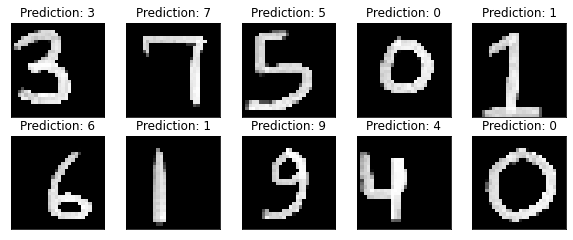

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for num, data in enumerate(test_data[:10]):
    img_data = data[0]
    y = fig.add_subplot(5,5, num + 1)
    orig = img_data
    data = img_data.reshape(28,28, 1)
    model_out = model.predict([data])
    str_label = "Prediction: " + str(np.argmax(model_out))

    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()
